In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo 

C:\Users\15783\AppData\Local\Temp\ipykernel_41852\635293251.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


[Germen Credit dataset](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data) is to classifies people described by a set of attributes as good or bad credit risks.

In [10]:
# fetch dataset 
german = fetch_ucirepo(id=144) 

raw_df=pandas.DataFrame(german.data.original)

display(german.variables)

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


Other than sex, the dataset also has following protected attributes:
- Age (Attribute13)

In [4]:
print(f"The dataset contains {raw_df.shape[0]} entries")
print(f"Number of duplicate entries: {raw_df.duplicated().sum()}")

df=raw_df.drop_duplicates()

print(f"The dataset contains {df.shape[0]} unique entries")
print(f"This datasets has {df.shape[1]-1} features")

The dataset contains 1000 entries
Number of duplicate entries: 0
The dataset contains 1000 unique entries
This datasets has 20 features


In [ ]:
label_column="class"

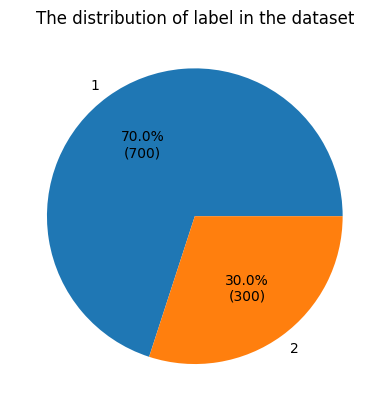

In [11]:
label_count = df[label_column].value_counts()

def autolabel(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(label_count,labels=label_count.index, autopct=lambda pct: autolabel(pct, label_count))
plt.title("The distribution of label in the dataset")
plt.show()

The label is imbalanced, with positive dominating the dataset. (1 is positive, 2 is negative according to dataset schema)

In [6]:
sex_column="Attribute9"
privilleged_group="male"

The analysis of protected variable sex

In [7]:
# Unifying attributes value to male and female for simplicity sake.
df[sex_column]=df[sex_column].replace(["A91","A92","A93","A94","A95"],["male","female","male","male","female"])

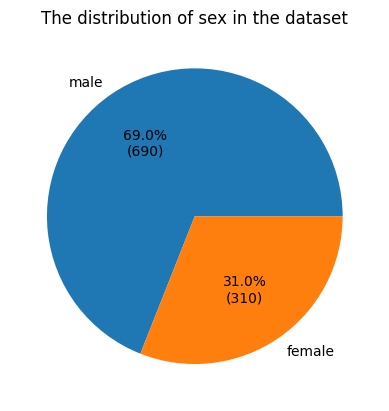

In [8]:
sex_count = df[sex_column].value_counts()

plt.pie(sex_count,labels=sex_count.index, autopct=lambda pct: autolabel(pct, sex_count))
plt.title("The distribution of sex in the dataset")
plt.show()

The distribution of protected attribute of dataset skews towards privilleged groups

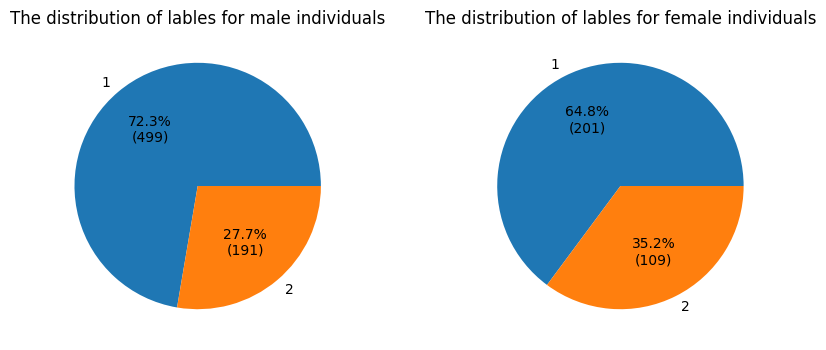

In [9]:
man_df=df.loc[df[sex_column]==privilleged_group].loc[:,[sex_column,label_column]]
woman_df=df.loc[df[sex_column]!=privilleged_group].loc[:,[sex_column,label_column]]

male_label_count=man_df[label_column].value_counts()
female_label_count=woman_df[label_column].value_counts()

fig, ax=plt.subplots(1,2,figsize=(10, 4))
ax[0].pie(male_label_count,labels=male_label_count.index, autopct=lambda pct: autolabel(pct, male_label_count))
ax[0].set_title("The distribution of lables for male individuals")
ax[1].pie(female_label_count,labels=female_label_count.index, autopct=lambda pct: autolabel(pct, female_label_count))
ax[1].set_title("The distribution of lables for female individuals")
plt.show()

Regarding this protected varaible, the dataset is dominated by Male.

However, the label distribution are similar for both protected groups and privilleged grousp compared to overral distribution.